In [2]:
%matplotlib inline
from fredapi import Fred
fred = Fred(api_key='48602a9ca88b2b0eefabd0904eaeb6be')
#data = fred.get_series('SP500')
import pandas as pd
from pandas.tseries.offsets import *
pd.options.display.max_colwidth = 60
import numpy as np
import matplotlib.pyplot as plt
import urllib3
import urllib
from IPython.core.pylabtools import figsize
figsize(20, 5)
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import exp, expm1
import statsmodels.api as sm
from statsmodels.tsa.arima_model import _arma_predict_out_of_sample

[ 300.73601832  231.11451428  231.11451428  231.11451428  231.11451428
  231.11451428  231.11451428  231.11451428  231.11451428  231.11451428
  231.11451428  231.11451428]
Living in San Jose, the maximum duration is  3.84609721144 months; the minimum duration is  2.9557114371 months.


'\nOHIO_month = 200\n\nprint("Living in Cleveland, the maximum duration is ",  (initial_assets/(OHIO_month * 3 * min(CPI)/100)), "months; "\n      "the minimum duration is ", (initial_assets/(OHIO_month * 3 * max(CPI)/100)), "months.")\n'

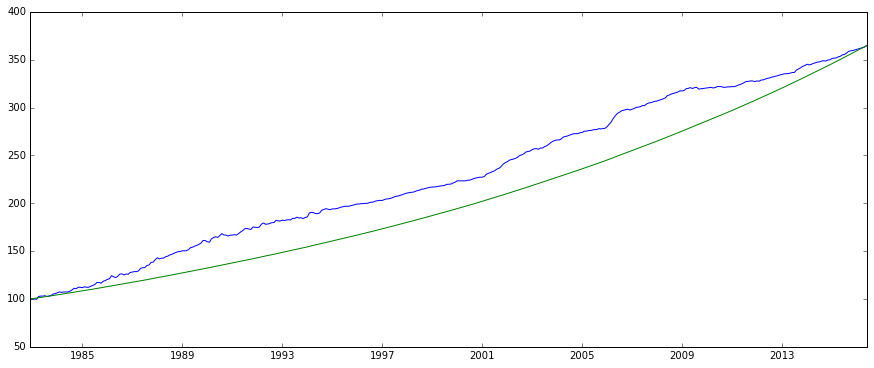

In [5]:
### Given P, Q, predictions_ARIMA by residual, if fail ### CUURA422SA0, CUURA210SA0L2 (monthly)
series = fred.get_series('CUURA101SEHC01')
series = series[np.logical_not(np.isnan(series))]

def pred_ARIMA(p, q, series):
    ts_log = np.log(series)
    model = ARIMA(ts_log, order=(p, 1, q))  
    results_ARIMA = model.fit(disp = -1, method = 'css')  
    predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
    predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
    predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
    predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
    predictions_ARIMA = np.exp(predictions_ARIMA_log)
    return predictions_ARIMA

p = 0
q = 1

plt.plot(series)
plt.plot(pred_ARIMA(p, q, series), color='green')

# get what you need for predicting future ahead
res = sm.tsa.ARMA(series, order=(p, q)).fit() 
params = res.params
residuals = res.resid
#print(residuals)
p = res.k_ar
q = res.k_ma
k_exog = res.k_exog
k_trend = res.k_trend
steps = 12
CPI = _arma_predict_out_of_sample(params, steps, residuals, p, q, k_trend, k_exog, endog=series, exog=None, start=len(series))
print(CPI)
#### Calculate survival period ####

# initial assest of an employee get layoff
initial_assets = 20000
#CPI = [300, 400, 500, 600]

# Housing price moneth pay 1982 as basis
CA_month = 750

print("Living in San Jose, the maximum duration is ", (initial_assets/(CA_month * 3 * min(CPI)/100)), "months; "
      "the minimum duration is ", (initial_assets/(CA_month * 3 * max(CPI)/100)), "months." ) 

'''
OHIO_month = 200

print("Living in Cleveland, the maximum duration is ",  (initial_assets/(OHIO_month * 3 * min(CPI)/100)), "months; "
      "the minimum duration is ", (initial_assets/(OHIO_month * 3 * max(CPI)/100)), "months.")
'''


C:\Users\syc\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\syc\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\syc\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(3, 3, 3335.0450816355883)


C:\Users\syc\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[ 215.67770575  216.08581018  218.59917567  215.90703678  211.09427204
  211.32228933  213.7435441   211.34573952  206.74827747  206.81318304
  209.13868019  207.01237682]
Living in Los Angeles, the maximum duration is  4.29937748343 months; the minimum duration is  4.06629570388 months.


C:\Users\syc\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


'\nOHIO_month = 200\n\nprint("Living in Cleveland, the maximum duration is ",  (initial_assets/(OHIO_month * 3 * CPI[0]/100)), "months; "\n      "the minimum duration is ", (initial_assets/(OHIO_month * 3 * CPI[-1]/100)), "months.")\n'

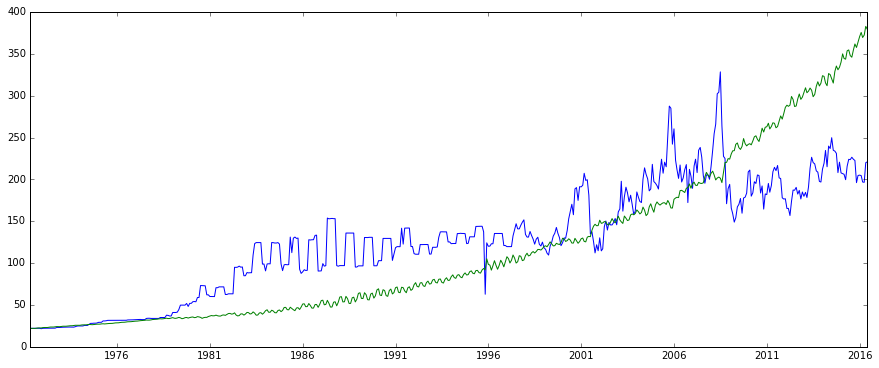

In [23]:
### Given P, Q, predictions_ARIMA by residual ### CUURA422SA0, CUURA210SA0L2 (monthly)

series = fred.get_series('CUURA421SEHF02')
series = series[np.logical_not(np.isnan(series))]
#res = sm.tsa.ARMA(series, (3, 4)).fit()
#res_error = sum(res.resid.values**2)
#print(res_error)

def pred_ARIMA(p, q, series):
    ts_log = np.log(series)
    model = ARIMA(ts_log, order=(p, 1, q))  
    results_ARIMA = model.fit(disp = -1, method = 'css')  
    predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
    predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
    predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
    predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
    predictions_ARIMA = np.exp(predictions_ARIMA_log)
    return predictions_ARIMA


UpperLimit = 4
p = range(0, UpperLimit + 1)
q = range(0, UpperLimit + 1)

## perform model order optimization##

def opt_paras(series):
   
    res = sm.tsa.ARMA(series, (0, 0)).fit()
    res_error = sum(res.resid.values**2)
    opt_p = 0
    opt_q = 0
    
    for i in range(0, UpperLimit):
        for j in range(0, UpperLimit):
            #if i==0 and j==0:
            #    continue
            res = sm.tsa.ARMA(series, (p[i], q[j])).fit()            
            new_res_error = sum(res.resid.values**2) 
            if (new_res_error < res_error):
                res_error = new_res_error
                opt_p = p[i]
                opt_q = q[j]
                   
    series_pred = pred_ARIMA(opt_p, opt_q, series)
    return opt_p, opt_q, mean_squared_error(series, series_pred)               

result = opt_paras(series)
print(result) 
plt.plot(series)
plt.plot(pred_ARIMA(result[0], result[1], series), color='green')

# get what you need for predicting future ahead
res = sm.tsa.ARMA(series, order=(result[0], result[1])).fit() 
params = res.params
residuals = res.resid
p = res.k_ar
q = res.k_ma
k_exog = res.k_exog
k_trend = res.k_trend
steps = 12
CPI = _arma_predict_out_of_sample(params, steps, residuals, p, q, k_trend, k_exog, endog=series, exog=None, start=len(series))
print(CPI)
#### Calculate survival period ####

# initial assest of an employee get layoff
initial_assets = 20000
#CPI = [300, 400, 500, 600]

# Housing price moneth pay 1982 as basis
CA_month = 750

print("Living in Los Angeles, the maximum duration is ", (initial_assets/(CA_month * 3 * min(CPI)/100)), "months; "
      "the minimum duration is ", (initial_assets/(CA_month * 3 * max(CPI)/100)), "months." ) 

'''
OHIO_month = 200

print("Living in Cleveland, the maximum duration is ",  (initial_assets/(OHIO_month * 3 * CPI[0]/100)), "months; "
      "the minimum duration is ", (initial_assets/(OHIO_month * 3 * CPI[-1]/100)), "months.")
'''


In [7]:
# initial assest of an employee get layoff
initial_assets = 20000
CPI = [300, 400, 500, 600]

# Housing price moneth pay 1982
CA_month = 750

print("Living in San Jose, the maximum duration is ", (initial_assets/(CA_month * 3 * CPI[0]/100)), "months; "
      "the minimum duration is ", (initial_assets/(CA_month * 3 * CPI[-1]/100)), "months." ) 

OHIO_month = 200

print("Living in Cleveland, the maximum duration is ",  (initial_assets/(OHIO_month * 3 * CPI[0]/100)), "months; "
      "the minimum duration is ", (initial_assets/(OHIO_month * 3 * CPI[-1]/100)), "months.") 

Living in San Jose, the maximum duration is  2.962962962962963 months; the minimum duration is  1.4814814814814814 months.
Living in Cleveland, the maximum duration is  11.11111111111111 months; the minimum duration is  5.555555555555555 months.
